# Credits

https://www.chess.com/

# Introduction

## About Us:


We are Eran Kimchi and Nimrod Wainberg, third year computer science students at HIT College. Our project is in a data science course taught by Dr. Naama Kupelman.



## What is the project about?


The project is about online chess players. The idea of this project is to predict the player online chess elo using the data in the site. 

# Why did we choose this project?


We love chess, Nimrod is a professional chess player, and Eran loves to play chess

# Download packages

In [ ]:
#pip install selenium

# Imports

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, f1_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Crawling With Selenium

In [3]:
driver = webdriver.Firefox()
blitz_rank_table_dict = {}
headers = []
driver.get('https://www.chess.com/leaderboard/live?page=1')
time.sleep(2)
rank_table = driver.find_elements(By.TAG_NAME, 'table')[0]
for row in rank_table.find_elements(By.TAG_NAME, 'tr'):
    for col in row.find_elements(By.TAG_NAME, 'th'):
        blitz_rank_table_dict[col.text] = []
        headers.append(col.text)
append_to_table = ["Won","Draw","Lost","Highest_Rating_Blitz","Accuracy","Total_Games","Best_Win_Streak"
                    ,"Current_Puzzles_Rating","Highest_Rating_Puzzles","Traing_Time","Total_Puzzles"
                   ,"Correct_Puzzles","Incorrect_Puzzles","Puzzles_Rush", "Last_Puzzle"]

dict_append = {"Won": "wonCount","Draw": "drawCount","Lost": "lostCount","Highest_Rating_Blitz": "HighestRating"
               ,"Accuracy": "Accuracy","Total_Games":"TotalGames","Best_Win_Streak":"BestWinStreak"
               ,"Current_Puzzles_Rating": "CurrentPuzzlesRating","Highest_Rating_Puzzles": "HighestRatingPuzzles"
               ,"Traing_Time": "TraingTime","Total_Puzzles": "TotalPuzzles","Correct_Puzzles": "CorrectPuzzles"
               ,"Incorrect_Puzzles": "IncorrectPuzzles","Puzzles_Rush": "PuzzleRush", "Last_Puzzle": "LastPuzzle"}
for col in append_to_table:
    blitz_rank_table_dict[col]=[]

for page in range(5, 100):
    driver.get('https://www.chess.com/leaderboard/live?page={}'.format(page))
    time.sleep(2)
    rank_table = driver.find_elements(By.TAG_NAME, 'table')[0]
    for row in rank_table.find_elements(By.TAG_NAME, 'tr'):
        for i, col in enumerate(row.find_elements(By.TAG_NAME, 'td')):
            blitz_rank_table_dict[headers[i]].append(col.text)
            
del blitz_rank_table_dict["Won / Draw / Lost"]
for i,user in enumerate(blitz_rank_table_dict["Player"]):
    name=user.split()[-1]
    blitz_rank_table_dict["Player"][i] = name
    try:
        driver.get('https://www.chess.com/stats/live/blitz/{}'.format(name))
        time.sleep(1)
    except:
        driver.get('https://www.chess.com/stats/live/blitz/{}'.format(name))
        time.sleep(1)
        
    try:
        wonCount = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div/section[4]/div[2]/div[2]/div[3]/span[1]')[0].text.split()[0]
        drawCount = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div/section[4]/div[2]/div[2]/div[3]/span[2]')[0].text.split()[0]
        lostCount = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div/section[4]/div[2]/div[2]/div[3]/span[3]')[0].text.split()[0]     
    except:
        lostCount = "0"
    try:
        HighestRating = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div/section[3]/div[1]/div[2]/div')[0].text
        Accuracy = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div/section[3]/div[2]/div[2]/div')[0].text
        TotalGames = driver.find_elements(By.XPATH, '/html/body/div[1]/div[2]/main/div[1]/div[3]/div/section[4]/div[2]/div[1]/div[2]/div')[0].text
        BestWinStreak = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div/section[5]/div[2]/div[2]/div')[0].text
    except:
        wonCount = "0"
        drawCount = "0"
        HighestRating = "0"        
        Accuracy = "0"
        TotalGames = "0" 
        BestWinStreak = "0"
    if (Accuracy == "--"): Accuracy = "0"
    try:
        driver.get('https://www.chess.com/stats/puzzles/{}'.format(name))
        time.sleep(1)
        PuzzleRush = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[2]/div[2]/div/div[1]/span[2]')[0].text
    except:
        #print("No Puzzle Rush"+", User: "+name)
        PuzzleRush = "0"
    try:    
        TraingTime = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div[3]/div[2]/div/div[2]/div')[0].text.split()[0]
        HighestRatingPuzzles = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div[3]/div[1]/div/div[2]')[0].text
        CurrentPuzzlesRating = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div[1]/div[1]')[0].text
    except:
        TraingTime = "0"
        CurrentPuzzlesRating = "0"
        
    try:
        TotalPuzzles = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div[4]/div/div[2]/div')[0].text
        if(not TotalPuzzles == "0"):
            CorrectPuzzles = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div[6]/div/div[3]/span[1]')[0].text.split()[0]
            IncorrectPuzzles = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[3]/div[6]/div/div[3]/span[3]')[0].text.split()[0]
            LastPuzzle = driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/main/div[1]/div[4]/div[3]/div/table/tbody/tr[1]/td[1]')[0].text
        else:
            CorrectPuzzles = "0"
            IncorrectPuzzles = "0"
            LastPuzzle = "0"
            HighestRatingPuzzles = "0"
    except:
        IncorrectPuzzles="0"
        
    for key,value in dict_append.items():
        blitz_rank_table_dict[key].append(globals()[value])
pd.DataFrame(blitz_rank_table_dict).to_csv("Chess Prediction", encoding='utf-8')
driver.quit()

# Data Cleaning

In this section we are taking our Dataframe we have prepared and starting to clean the mess.


### Handle Missing Values

Drop missing and NA values

In [5]:
df = pd.read_csv('./Chess Prediction.csv').drop('Unnamed: 0',axis=1)
new_df = df.copy()
new_df = new_df.drop(new_df[df.Rating == 0].index)
new_df = new_df.drop(new_df[new_df.Total_Puzzles == "0"].index)
new_df = new_df.dropna(subset=['Puzzles_Rush'])
new_df

,Rank,Player,Rating,Won,Draw,Lost,Highest_Rating_Blitz,Accuracy,Total_Games,Best_Win_Streak,Current_Puzzles_Rating,Highest_Rating_Puzzles,Traing_Time,Total_Puzzles,Correct_Puzzles,Incorrect_Puzzles,Puzzles_Rush,Last_Puzzle
2,#203,JoseMaxin,2855,"1,901",184,548,2855,83.2,"2,633",54,1188,1188,1,180,107,73,0.0,"Nov 27, 2018"
3,#204,TranJMinh,2855,906,130,613,2929,86.1,"1,649",12,3261,3261,25,174,114,60,42.0,"Jun 2, 2022"
4,#205,KhalilMousavi98,2854,209,38,124,3022,86.6,371,15,3563,3629,13,555,336,219,65.0,"Mar 28, 2022"
5,#206,Keranke,2854,"5,802",979,"4,696",2945,83.9,"11,477",20,2858,2862,0,39,22,17,49.0,"Jun 25, 2019"
6,#207,Jumbo,2854,"2,097",417,"1,881",2963,87.0,"4,395",10,3436,3762,64,"3,739","1,861","1,878",51.0,"May 29, 2022"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6741,#6942,hermanho,2354,"1,345",115,"1,076",2457,77.5,"2,536",11,2892,2892,63,714,391,323,48.0,"Jun 17, 2022"
6742,#6943,Jimmy720,2354,"9,606","1,461","9,537",2545,80.8,"20,604",17,3118,3220,49,"2,750","1,529","1,221",30.0,"Jun 19, 2022"
6743,#6944,NguyenHlb,2354,796,89,651,2559,76.5,"1,536",10,3365,3365,62,"2,365","1,257","1,108",39.0,"Jun 14, 2022"
6744,#6945,YWAM,2354,"1,193",173,937,2400,76.2,"2,303",15,1293,1293,0,14,10,4,2068.0,"Dec 17, 2021"


### Data Handling

In this section, we will explore if our data is balanced and update our data if necessary, such as removing outliers or balancing with oversampling, etc.


In [5]:
new_df = new_df[new_df.Total_Games != "0"]  
new_df = new_df[new_df.Puzzles_Rush < 60]
new_df = new_df[new_df.Traing_Time < 200]  
new_df = new_df[new_df.Current_Puzzles_Rating < 6000]
new_df = new_df[new_df.Puzzles_Rush != 0]  
new_df = new_df[new_df.Accuracy != 0]
new_df['Total_Games'] = new_df['Total_Games'].str.replace(',','').astype(int)
new_df['Best_Win_Streak'] = new_df['Best_Win_Streak'].str.replace(',','').astype(int)
new_df['Highest_Rating_Blitz'] = new_df['Highest_Rating_Blitz'].str.replace(',','').astype(int)
new_df['Won'] = new_df['Won'].str.replace(',','').astype(int)
new_df['Draw'] = new_df['Draw'].str.replace(',','').astype(int)
new_df['Lost'] = new_df['Lost'].str.replace(',','').astype(int)
new_df = new_df[new_df.Won<10000]
new_df

,Rank,Player,Rating,Won,Draw,Lost,Highest_Rating_Blitz,Accuracy,Total_Games,Best_Win_Streak,Current_Puzzles_Rating,Highest_Rating_Puzzles,Traing_Time,Total_Puzzles,Correct_Puzzles,Incorrect_Puzzles,Puzzles_Rush,Last_Puzzle
3,#204,TranJMinh,2855,906,130,613,2929,86.1,1649,12,3261,3261,25,174,114,60,42.0,"Jun 2, 2022"
5,#206,Keranke,2854,5802,979,4696,2945,83.9,11477,20,2858,2862,0,39,22,17,49.0,"Jun 25, 2019"
6,#207,Jumbo,2854,2097,417,1881,2963,87.0,4395,10,3436,3762,64,"3,739","1,861","1,878",51.0,"May 29, 2022"
7,#208,OldweakGM,2854,171,22,57,2917,89.6,250,12,1741,1741,0,2,1,1,54.0,"Aug 26, 2021"
8,#209,severomorskij,2854,689,147,466,2926,87.5,1302,18,3556,3556,22,"2,505","1,179","1,326",54.0,"Jun 5, 2022"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,#6940,UncreativeName123,2354,1404,295,1107,2562,81.8,2806,12,2504,2539,8,622,355,267,32.0,"Aug 5, 2021"
6740,#6941,StalemateFortress,2354,4301,625,4545,2528,80.7,9471,9,3211,3293,115,"8,912","4,309","4,603",47.0,"Apr 19, 2022"
6741,#6942,hermanho,2354,1345,115,1076,2457,77.5,2536,11,2892,2892,63,714,391,323,48.0,"Jun 17, 2022"
6742,#6943,Jimmy720,2354,9606,1461,9537,2545,80.8,20604,17,3118,3220,49,"2,750","1,529","1,221",30.0,"Jun 19, 2022"



Now after we investigated our data we will convert the data into numerical variables in order to use it in future calculatures.

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4169 entries, 3 to 6743
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    4169 non-null   object 
 1   Player                  4169 non-null   object 
 2   Rating                  4169 non-null   int64  
 3   Won                     4169 non-null   int32  
 4   Draw                    4169 non-null   int32  
 5   Lost                    4169 non-null   int32  
 6   Highest_Rating_Blitz    4169 non-null   int32  
 7   Accuracy                4169 non-null   float64
 8   Total_Games             4169 non-null   int32  
 9   Best_Win_Streak         4169 non-null   int32  
 10  Current_Puzzles_Rating  4169 non-null   int64  
 11  Highest_Rating_Puzzles  4169 non-null   int64  
 12  Traing_Time             4169 non-null   int64  
 13  Total_Puzzles           4169 non-null   object 
 14  Correct_Puzzles         4169 non-null   

# EDA And Visualization

In this section, we will investigate our data more carefully and try to learn him better in order to succeed in predicting more accurately.



In [14]:
plt.figure(figsize=(20,20))
new_eda_df = new_df[['Rating','Won','Draw','Lost','Total_Games']]
new_eda_df['Won'] = new_eda_df['Won']  / new_eda_df['Total_Games']*100
new_eda_df['Draw'] = new_eda_df['Draw']  / new_eda_df['Total_Games']*100
new_eda_df['Lost'] = new_eda_df['Lost']  / new_eda_df['Total_Games']*100 
new_eda_df = new_eda_df[new_eda_df.Draw < 100]  

C:\Users\PC\AppData\Local\Temp/ipykernel_21676/300422206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_eda_df['Won'] = new_eda_df['Won']  / new_eda_df['Total_Games']*100
C:\Users\PC\AppData\Local\Temp/ipykernel_21676/300422206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_eda_df['Draw'] = new_eda_df['Draw']  / new_eda_df['Total_Games']*100
C:\Users\PC\AppData\Local\Temp/ipykernel_21676/300422206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

<Figure size 1440x1440 with 0 Axes>

### Check the connection between results and elo

We see that players with higher rating lose and win less than players with lower rating 

<AxesSubplot:xlabel='Rating'>

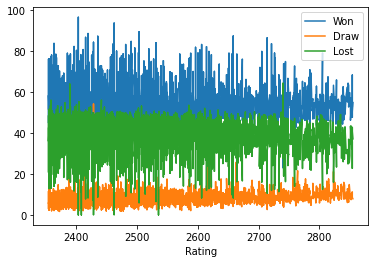

In [16]:
new_eda_df.plot(x='Rating',y=['Won','Draw','Lost'])

# Checking connection between Rating and amount of people
Here we can see that the higher the overall ranking, the smaller the number of people in the ranking

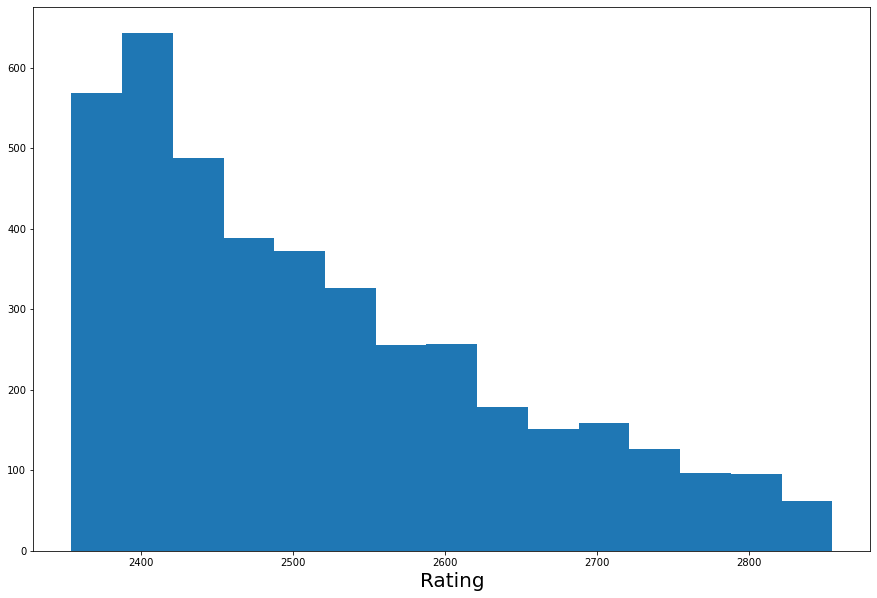

In [10]:
plt.figure(figsize=(15,10))
plt.hist(new_df.Rating, bins=15, histtype="stepfilled") 
plt.xlabel("Rating", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("")
plt.show()

# Sample of few histograms 
Here we can see few histogram of Rating , Won and Puzlles Rush 

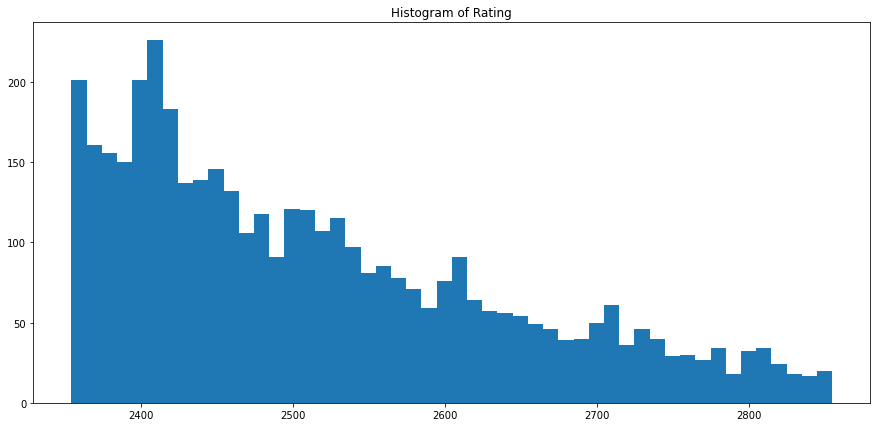

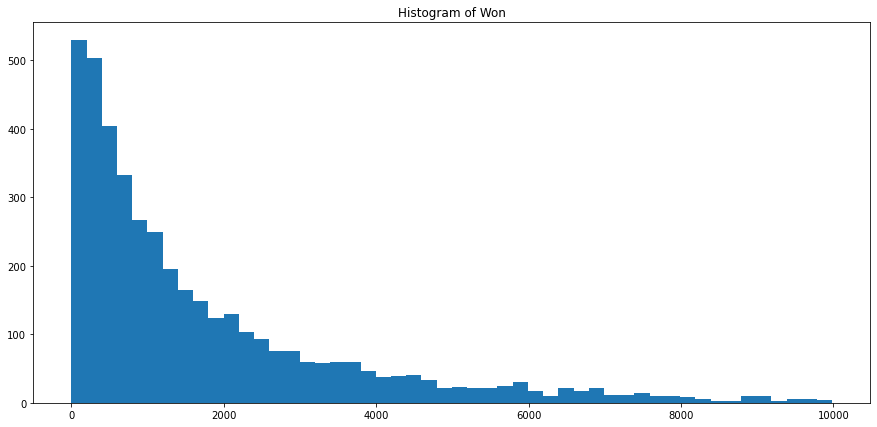

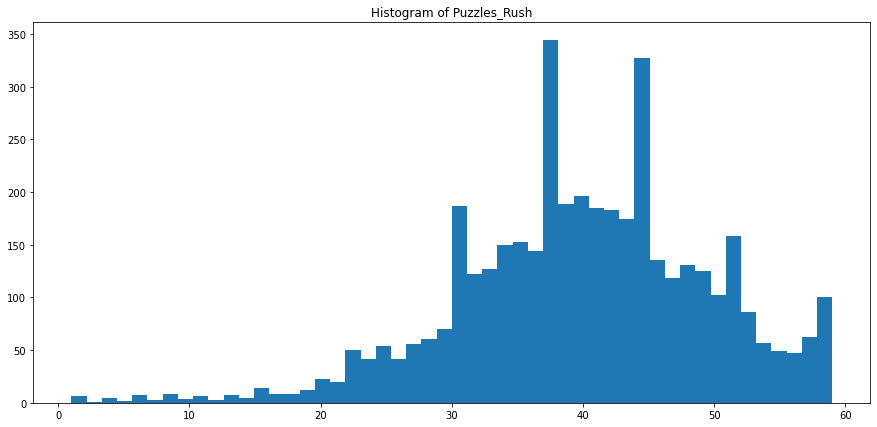

In [17]:
cols_for_hist = ['Rating','Won','Puzzles_Rush']
for col in cols_for_hist:
    fig, (ax) = plt.subplots(1, 1, figsize=(15,7))
    ax.hist(new_df[col],bins=50)
    ax.set_title('Histogram of ' + col)
    plt.show()

### Check connection between any two features using charts 

We see that accuracy has a big influence
on the other parameters. For example when players play more accuracy there rating is higher

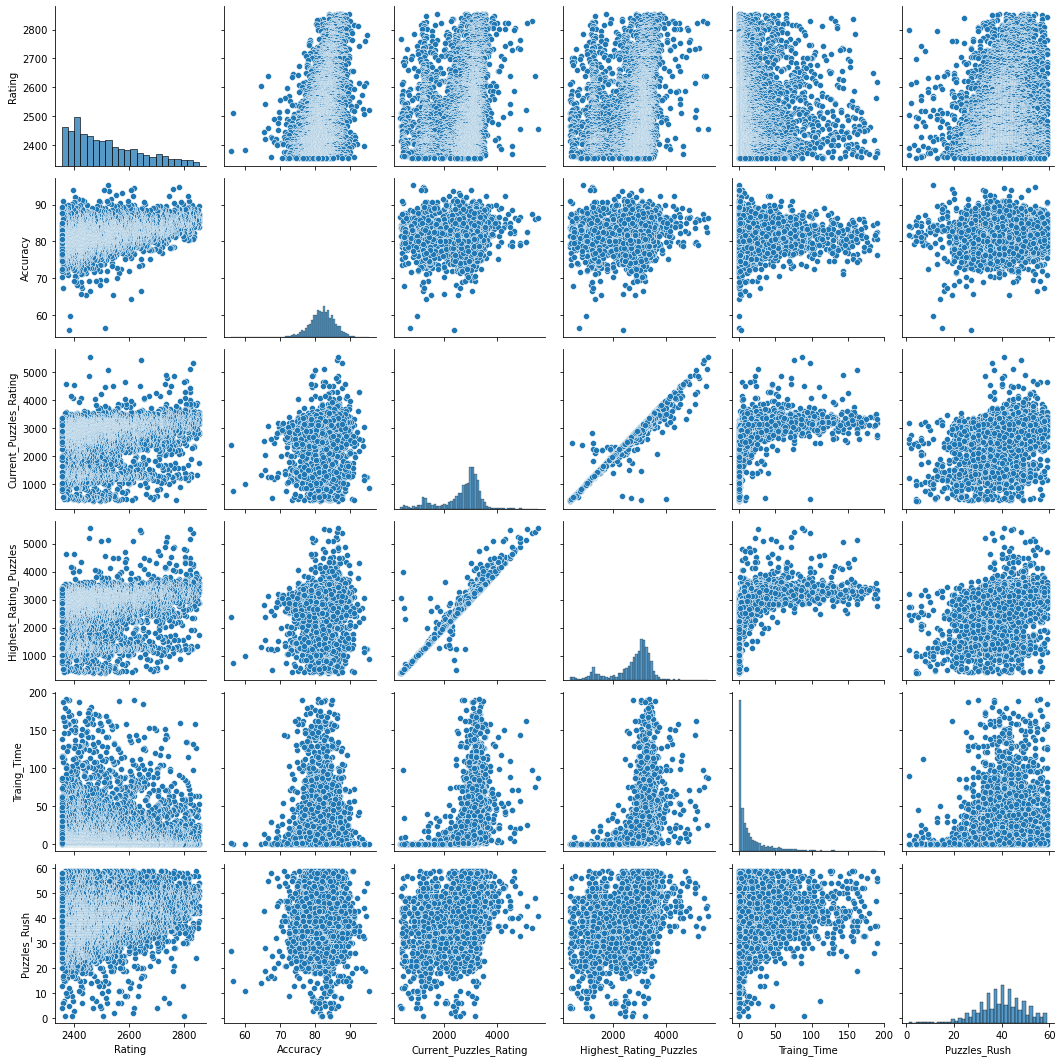

In [18]:
new_sns_df = new_df.copy()
new_sns_df = new_sns_df[['Rating','Accuracy','Current_Puzzles_Rating','Highest_Rating_Puzzles','Traing_Time','Puzzles_Rush']]
sns.pairplot(new_sns_df)

### Check connection between accuracy and rating

<Figure size 2880x2880 with 0 Axes>

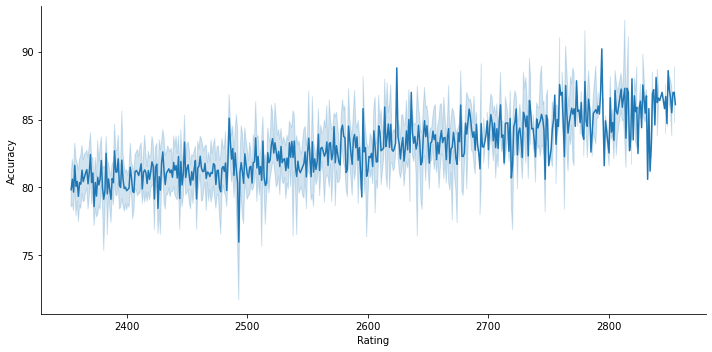

In [16]:
plt.figure(figsize=(40,40))
sns.relplot(
    data=new_sns_df, kind="line",
    x="Rating", y="Accuracy", height=5, aspect=2
)


In this chart we see direct connection between puzzle rush and rating, people who solves more puzzles have higher rating. People with rating higher than 2550 doesn't solve puzzles

<Figure size 2880x2880 with 0 Axes>

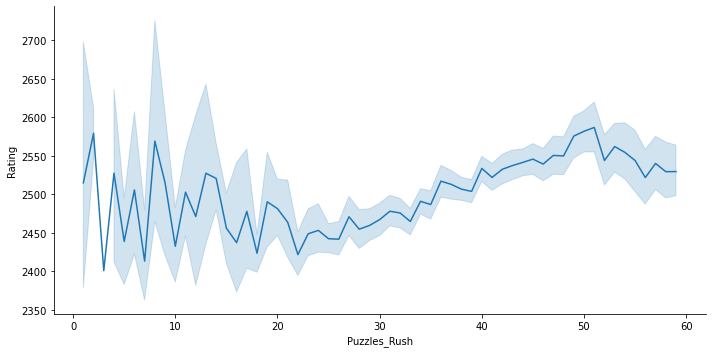

In [17]:
plt.figure(figsize=(40,40))
sns.relplot(
    data=new_sns_df, kind="line",
    x="Puzzles_Rush", y="Rating", height=5, aspect=2
)


# Checking connection between Rating, Puzzle Rush and Accuracy
As we can see that the higher the overall ranking, puzzle rush and accuracy are aims to the top.

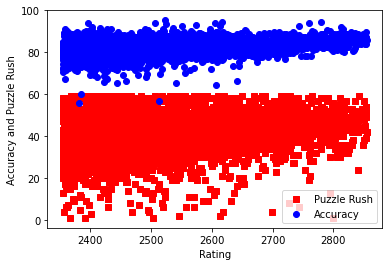

In [19]:
plt.scatter(x=new_df['Rating'],y=new_df['Puzzles_Rush'],c='r',marker='s',label='Puzzle Rush')
plt.scatter(x=new_df['Rating'],y=new_df['Accuracy'],c='b',marker='o',label='Accuracy')

plt.legend(numpoints=1,loc=4)
plt.xlabel('Rating')
plt.ylabel('Accuracy and Puzzle Rush')
plt.show()

# Machine Learning
We will examine a model of linear regression in order to find the appropriate model to answer the research question.
we have done a lot of manipulations above except deleting the exceptional values and splitting the description column.
Next we will look at using these manipulations to optimize our model.

In order to run a model of linear regression,first we cleaned nil and missing information, so now we will only select the columns we find that there is a connection between them and the object of the study.

C:\Users\PC\AppData\Local\Temp/ipykernel_21676/224343121.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(new_df['Rating'],m.predict(new_df.iloc[:,0:1]),'k',color='blue',linewidth=3)


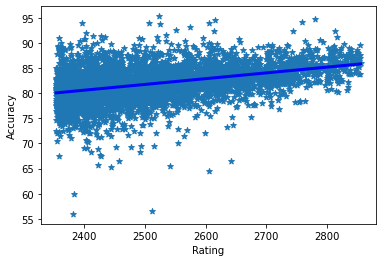

In [20]:
new_df = new_df[['Rating','Puzzles_Rush','Accuracy']]
m=linear_model.LinearRegression().fit(new_df.iloc[:,0:1],new_df.iloc[:,2:])
plt.scatter(x=new_df['Rating'],y=new_df['Accuracy'],marker='*',label='Accuracy')
plt.plot(new_df['Rating'],m.predict(new_df.iloc[:,0:1]),'k',color='blue',linewidth=3)
plt.xlabel('Rating')
plt.ylabel('Accuracy')
plt.show()

In [6]:
new_df = new_df[['Rating','Accuracy','Best_Win_Streak','Current_Puzzles_Rating','Highest_Rating_Blitz','Puzzles_Rush']]
new_df

,Rating,Accuracy,Best_Win_Streak,Current_Puzzles_Rating,Highest_Rating_Blitz,Puzzles_Rush
3,2855,86.1,12,3261,2929,42.0
5,2854,83.9,20,2858,2945,49.0
6,2854,87.0,10,3436,2963,51.0
7,2854,89.6,12,1741,2917,54.0
8,2854,87.5,18,3556,2926,54.0
...,...,...,...,...,...,...
6739,2354,81.8,12,2504,2562,32.0
6740,2354,80.7,9,3211,2528,47.0
6741,2354,77.5,11,2892,2457,48.0
6742,2354,80.8,17,3118,2545,30.0


#### Prepare dataset 

In [7]:
def split_dataset(df):
    Y = new_df['Rating']
    X = new_df.drop('Rating', axis = 1)
    return X , Y

#### Create test data

#### use machine learning: Linear Regression to train

In [8]:
def train_model(X_train, y_train):
    reg=LinearRegression()
    trained_model=reg.fit(X_train, y_train)
    return trained_model

### Try to predict online rating for each player

In [9]:
def predict(trained_model, X_test):
    y_predict=trained_model.predict(X_test)
    return y_predict

### Evaluate the model

In [10]:
def evaluate_performance(y_test,y_predicted):
    results = r2_score(y_test, y_predicted)
    return results

### Train the model, test the model, and evauate the it

In [15]:
X,Y = split_dataset(new_df)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
trained_model = train_model(X_train, Y_train)
Y_predict = predict(trained_model,X_test)
r2 = evaluate_performance(Y_test,Y_predict)
r2


0.7918797463999008

# Conclusion:

There is a lot more to do, We can continue diving into the data and try to make more connection and complex visualizations but our time in the course is limited.

Despite the time limit we were able to reach a very nice result of R2 SCORE, almost 0.8 and we are pleased that we were able to nicely predict the future Rating of players according to their performance.